In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

In [ ]:
from model.mdp import MDP
from model.env import TransProb, Policy

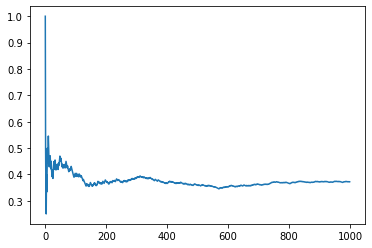

Success rate: 0.372


In [2]:
# set parameters ###############################################################
epoch = 1000
# set parameters ###############################################################

tp = TransProb()
transition_probs = tp.transition_probs

initial_distribution = np.array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]) / 9

if 1:
    p = Policy(policy='random') 
elif 1:
    p = Policy(policy='bad') 
elif 1:
    p = Policy(policy='optimal') 
elif 1:
    p = Policy(policy='noizy_optimal') 
policy = p.policy

mdp = MDP(transition_probs, initial_distribution, policy)

simulation_history = []
for _ in range(epoch):
    done = False
    mdp.reset()    
    while not done:
        mdp.step()
        if mdp.current_state == 3:
            done = True
            simulation_history.append(1.)
        elif mdp.current_state == 6:
            done = True
            simulation_history.append(0.)

history = np.cumsum(simulation_history) / (np.arange(epoch) + 1)
plt.plot(history)
plt.show()

print("Success rate: {}".format(history[-1]))